In [50]:
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## Importing experimental results

Reading the experimental results here, these depend on...
* The algorithm used to predict most influential node set (Greedy++, Page Rank, Degree, Random)
* The threshold used to determine when a node is turned active (linear, concave, convex, majority vote)
* The data set

The CSV files contain info on...

* `Size`: Size of seed set
* `Influence`: The predicted influence for a given setting, i.e. combination of values from the setting space defined above
* `Node Runtime`: Time required to calculate prediction for most influential vertex set
* `Inf Runtime`: Time required to calculate influence of given vertex set

### NetHEPT

In [17]:
df_greedy_nethept_linear = pd.read_csv("Results/Greedy++_output_NetHept_linear/Influence.csv")
df_pagerank_nethept_linear = pd.read_csv("Results/PageRank_output_NetHept_linear/Influence.csv")
df_degree_nethept_linear = pd.read_csv("Results/Degree_output_NetHept_linear/Influence.csv")
df_random_nethept_linear = pd.read_csv("Results/Random_output_NetHept_linear/Influence.csv")

In [18]:
df_greedy_nethept_convex = pd.read_csv("Results/Greedy++_output_NetHept_convex/Influence.csv")
df_pagerank_nethept_convex = pd.read_csv("Results/PageRank_output_NetHept_convex/Influence.csv")
df_degree_nethept_convex = pd.read_csv("Results/Degree_output_NetHept_convex/Influence.csv")
df_random_nethept_convex = pd.read_csv("Results/Random_output_NetHept_convex/Influence.csv")

In [19]:
df_degree_nethept_concave = pd.read_csv("Results/Degree_output_NetHept_concave/Influence.csv")

In [20]:
df_greedy_nethept_majority = pd.read_csv("Results/Greedy++_output_NetHept_majority/Influence.csv")
df_pagerank_nethept_majority = pd.read_csv("Results/PageRank_output_NetHept_majority/Influence.csv")
df_degree_nethept_majority = pd.read_csv("Results/Degree_output_NetHept_majority/Influence.csv")
df_random_nethept_majority = pd.read_csv("Results/Random_output_NetHept_majority/Influence.csv")

### NetPhy

In [21]:
df_greedy_netphy = pd.read_csv("Results/Greedy++_output_NetPhy_linear/Influence.csv")
df_pagerank_netphy = pd.read_csv("Results/PageRank_output_NetPhy_linear/Influence.csv")
df_degree_netphy = pd.read_csv("Results/Degree_output_NetPhy_linear/Influence.csv")
df_random_netphy = pd.read_csv("Results/Random_output_NetPhy_linear/Influence.csv")

### Epinions

In [22]:
df_greedy_epinions = pd.read_csv("Results/Greedy++_output_Epinions_linear/Influence.csv")
df_pagerank_epinions = pd.read_csv("Results/PageRank_output_Epinions_linear/Influence.csv")
df_degree_epinions = pd.read_csv("Results/Degree_output_Epinions_linear/Influence.csv")
df_random_epinions = pd.read_csv("Results/Random_output_Epinions_linear/Influence.csv")

## Statistical tests

Attempting the following tests...

* **Mann Whitney U test**: To inspect effect of algorithm on influence, data obtained depend on seed set size and follow no normal distribution, therefore using a non-parametric test here. Furthermore, since each run of any given setting includes generation of random numbers we are using a non-paired test
* **Unpaired t-test**: For a given seed set size inspect effect of algorithm on influence over multiple runs (here obtained values are reasoned to be independent and normally distributed around some mean)
* **Comparison w/ original authors**: Probably also some test to compare our obtained values with those from the original authors...

### Comparing algorithms (various seed set sizes)

In [32]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_pagerank_nethept[['Influence']])

MannwhitneyuResult(statistic=199.5, pvalue=0.30301264010261997)

In [81]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_degree_nethept[['Influence']])

MannwhitneyuResult(statistic=181.0, pvalue=0.16325855660250066)

In [34]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_random_nethept[['Influence']])

MannwhitneyuResult(statistic=29.5, pvalue=8.217521574816841e-07)

### Comparing algorithms (same seed set size, multiple runs)

In [23]:
infl_random = []
infl_degree = []
infl_pagerank = []

for i in range(40):
    infl_random.append(pd.read_csv(f"Results/Random_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])
    infl_degree.append(pd.read_csv(f"Results/Degree_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])
    infl_pagerank.append(pd.read_csv(f"Results/PageRank_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])

FileNotFoundError: [Errno 2] No such file or directory: 'Results/Random_output_NetHept_linear_iter0/Influence.csv'

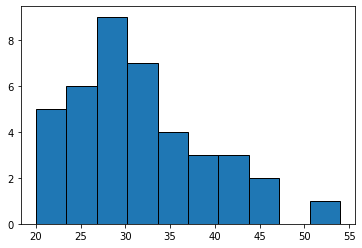

In [121]:
plt.hist(runtimes_random, edgecolor='black')
plt.show()

In [122]:
stat, p = stats.shapiro(runtimes_random)

if p > 0.05:
    print("Random influences: Normally distributed")
else:
    print("Random influences: Not(!) normally distributed")

Random influences: Normally distributed


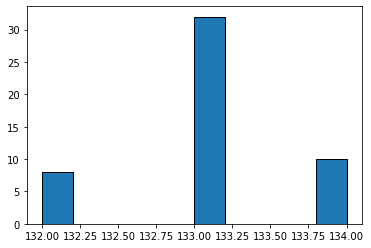

In [124]:
plt.hist(infl_pagerank, edgecolor='black')
plt.show()

In [125]:
stat, p = stats.shapiro(infl_pagerank)

if p > 0.05:
    print("PageRank influences: Normally distributed")
else:
    print("PageRank influences: Not(!) normally distributed")

PageRank influences: Not(!) normally distributed


In [128]:
stats.ttest_ind(infl_pagerank, infl_degree)

Ttest_indResult(statistic=903.2004244895463, pvalue=1.5610930801930885e-158)

## Visualization

* Visualizing effect of algorithm on influence for given data sets
* Visualizing run time of determining the prediction for most influencial node set for given data set, algorithm (threshold: linear)

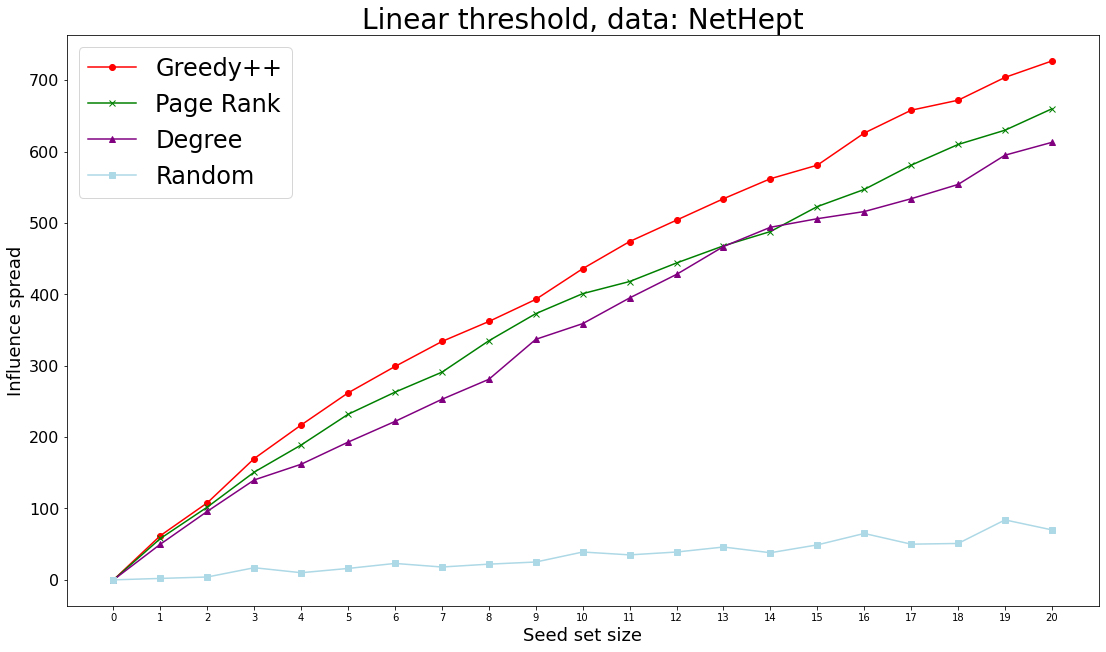

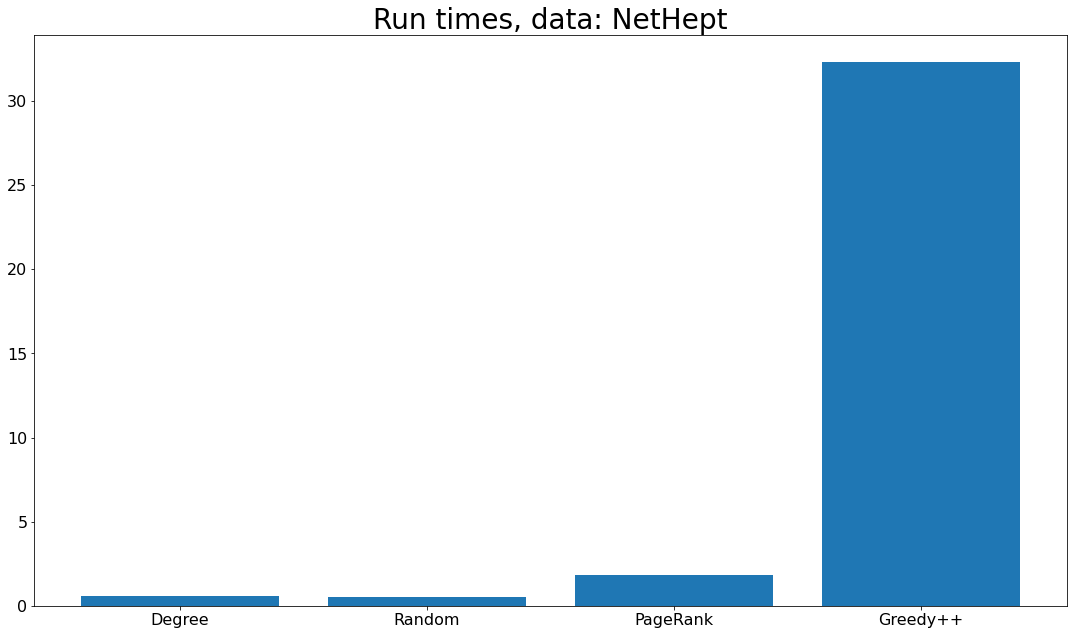

In [24]:
def plot_inf(data, df_greedy, df_pagerank, df_degree, df_random, threshold):
    plt.title(f"{threshold} threshold, data: {data}", fontsize=28)
    plt.plot(df_greedy.Size, df_greedy.Influence, marker="o", color="red", )
    plt.plot(df_pagerank.Influence, marker="x", color="green")
    plt.plot(df_degree.Influence, marker="^", color="purple")
    plt.plot(df_random.Influence, marker="s", color="lightblue")

    plt.legend(['Greedy++', 'Page Rank', 'Degree', 'Random'], fontsize=24)
    plt.xticks(np.arange(0, 21))
    plt.xlabel("Seed set size", fontsize=18)
    plt.ylabel("Influence spread", fontsize=18)
    plt.yticks(fontsize=16)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    plt.show()
    
    plt.title(f"Run times, data: {data}", fontsize=28)
    plt.bar(range(4), [(sum(df_degree.InfRuntime)/len(df_degree.InfRuntime)), 
                       (sum(df_random.InfRuntime)/len(df_random.InfRuntime)),
                       (sum(df_pagerank.InfRuntime)/len(df_pagerank.InfRuntime)),
                       (sum(df_greedy.InfRuntime)/len(df_greedy.InfRuntime))])
    plt.xticks(range(4), ['Degree', 'Random', 'PageRank', 'Greedy++'], fontsize=16)
    plt.yticks(fontsize=16)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    
plot_inf("NetHept", 
         df_greedy_nethept_linear, 
         df_pagerank_nethept_linear, 
         df_degree_nethept_linear, 
         df_random_nethept_linear,
         "Linear")

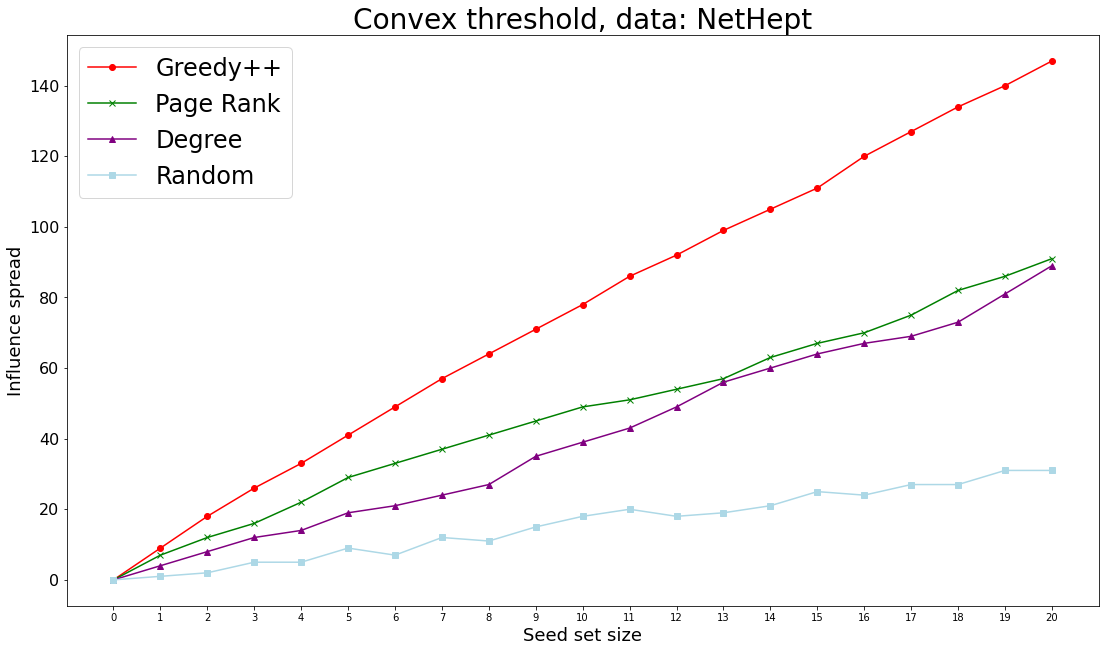

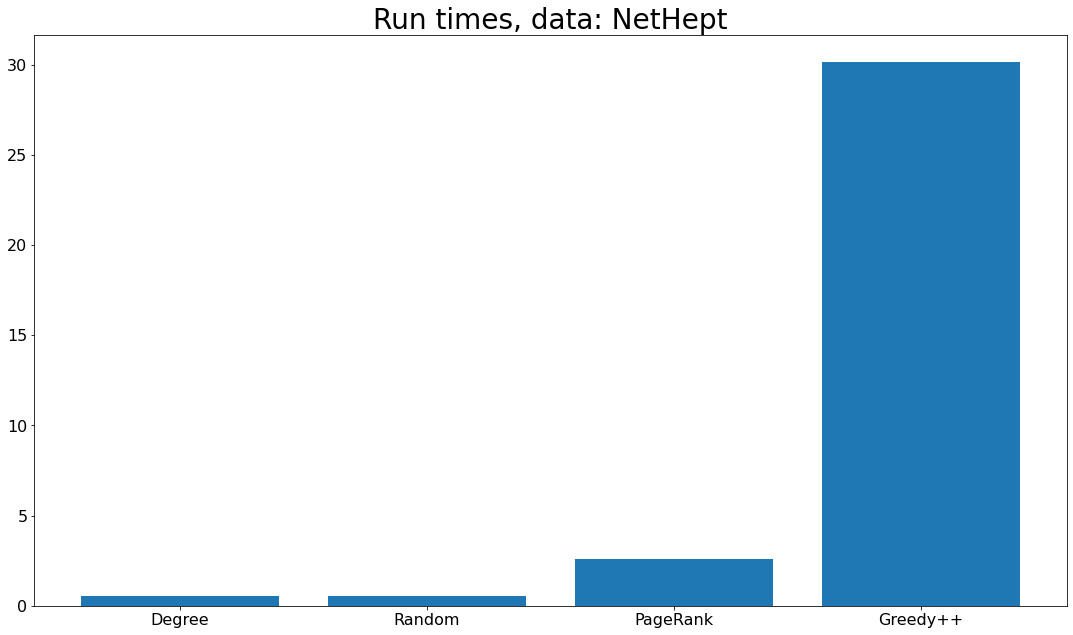

In [25]:
plot_inf("NetHept", 
         df_greedy_nethept_convex, 
         df_pagerank_nethept_convex, 
         df_degree_nethept_convex, 
         df_random_nethept_convex,
         "Convex")

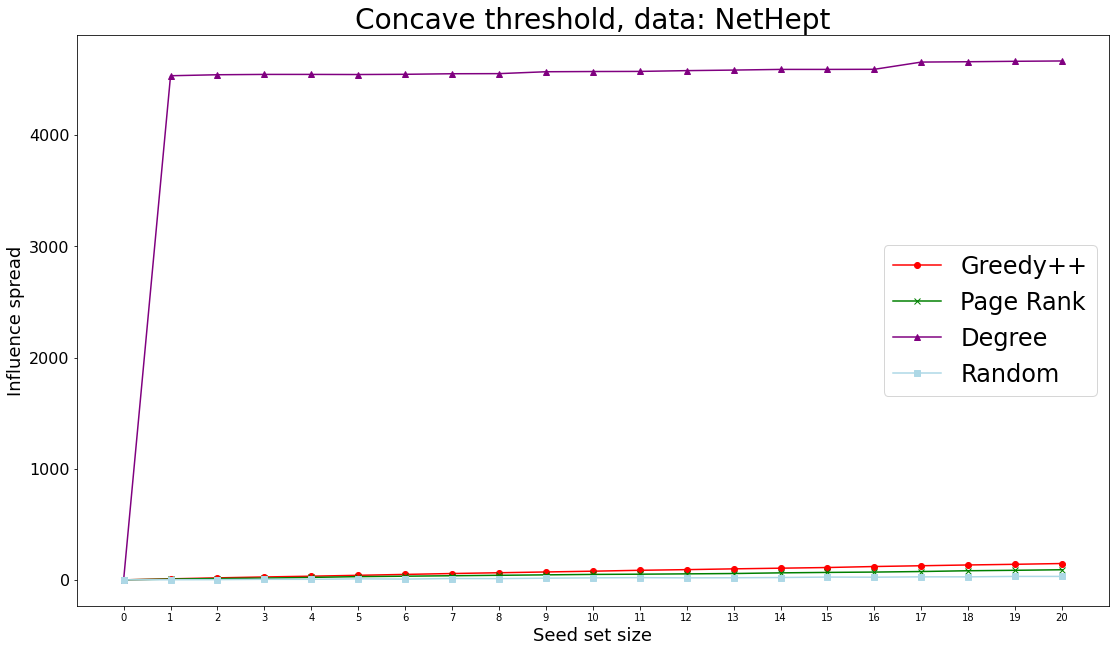

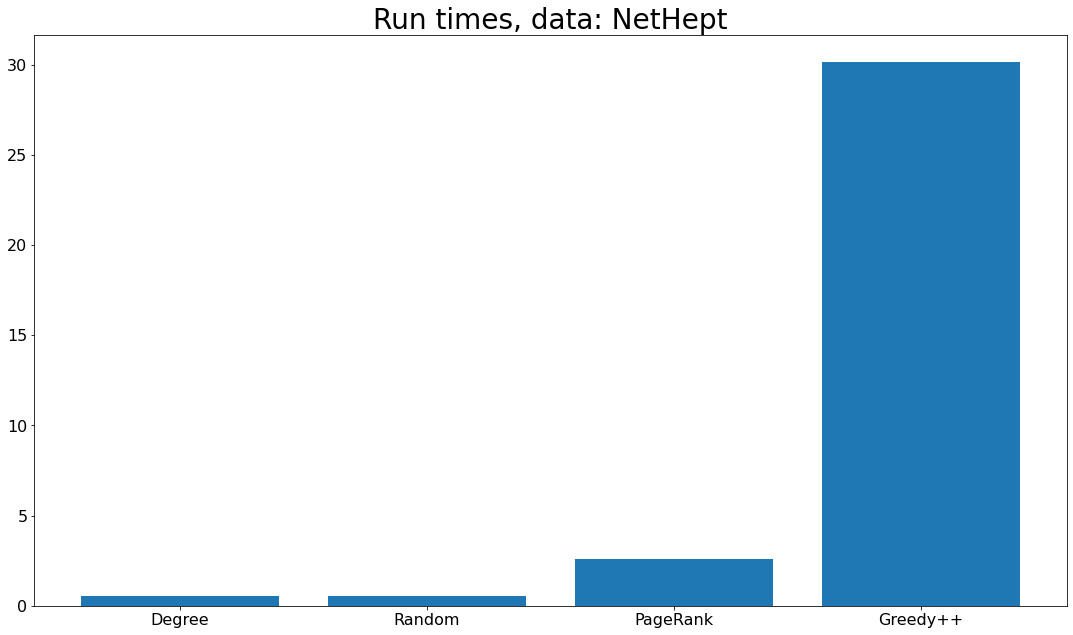

In [26]:
plot_inf("NetHept", 
         df_greedy_nethept_convex, 
         df_pagerank_nethept_convex, 
         df_degree_nethept_concave, 
         df_random_nethept_convex,
         "Concave")

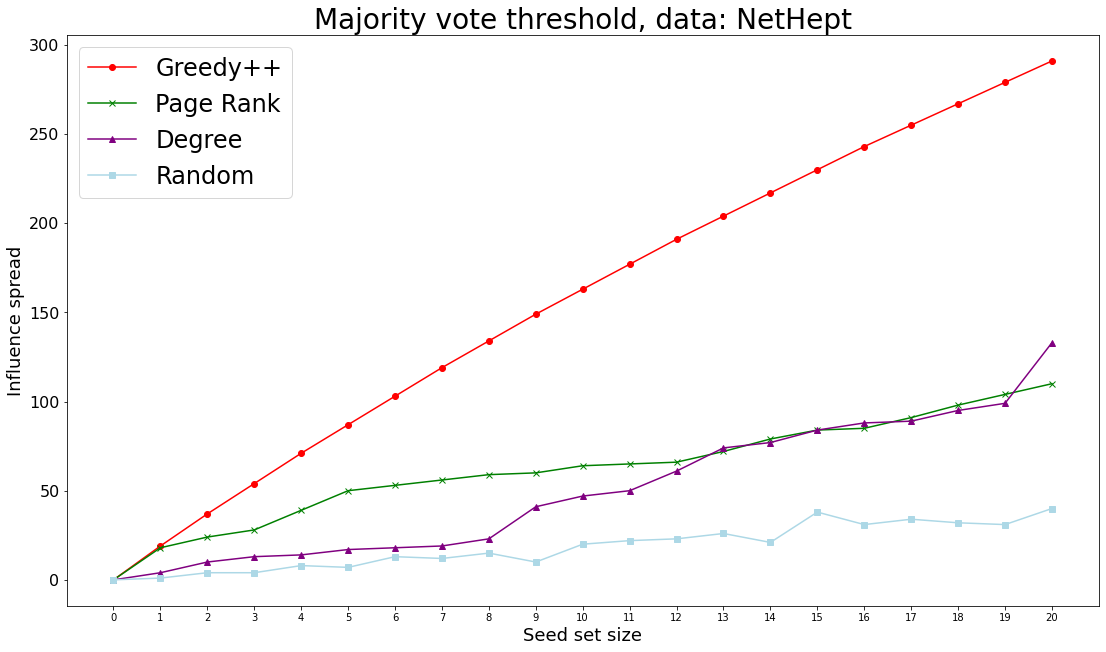

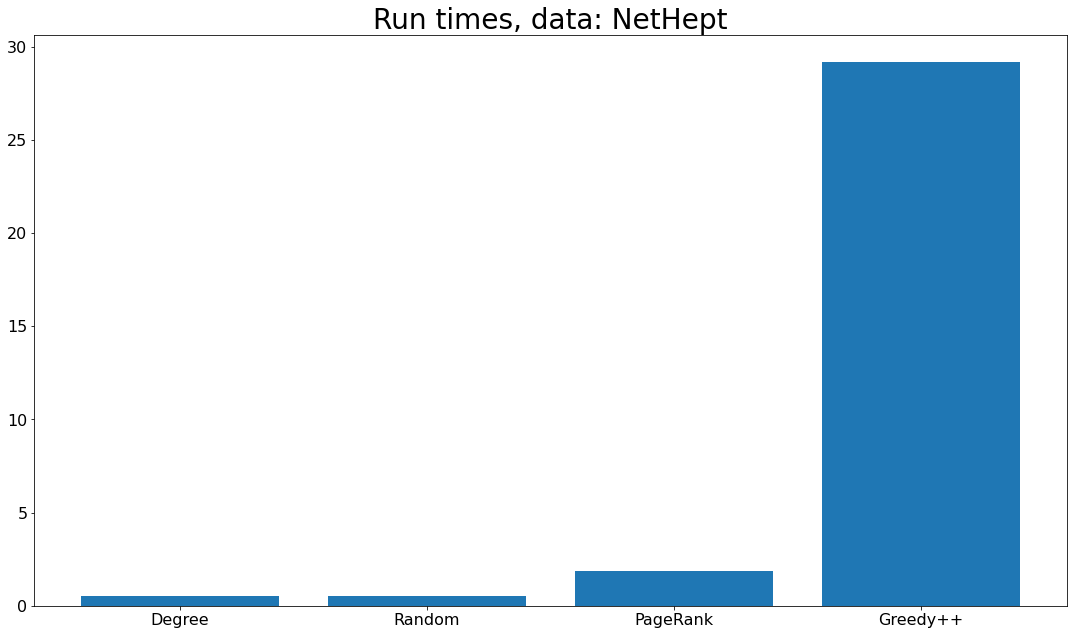

In [18]:
plot_inf("NetHept", 
         df_greedy_nethept_majority, 
         df_pagerank_nethept_majority, 
         df_degree_nethept_majority, 
         df_random_nethept_majority,
         "Majority vote")

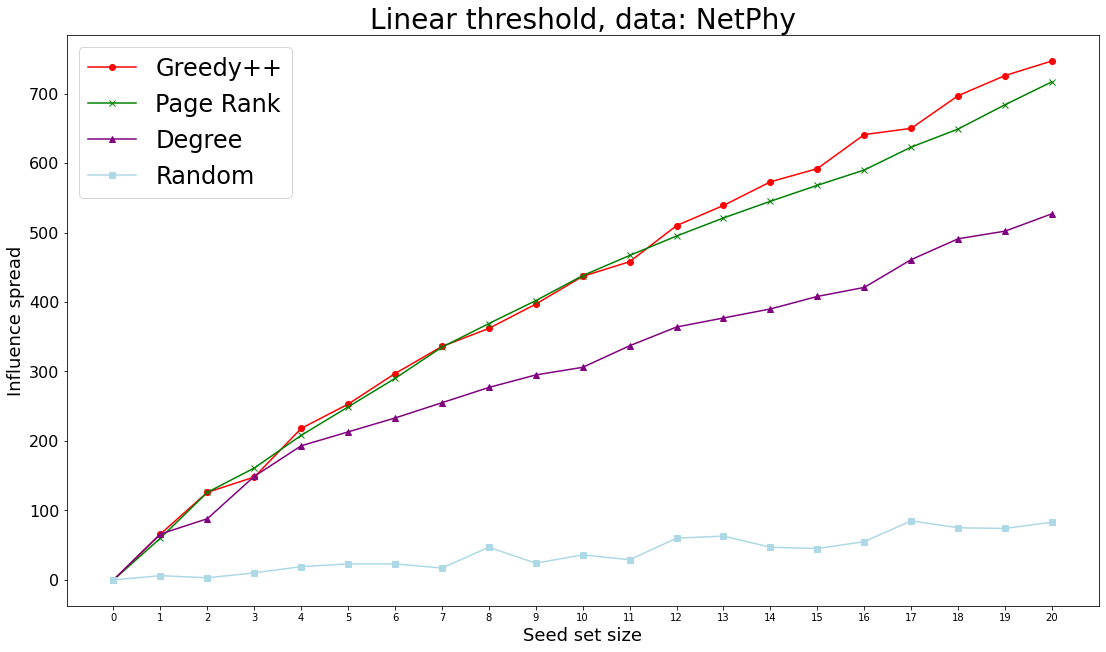

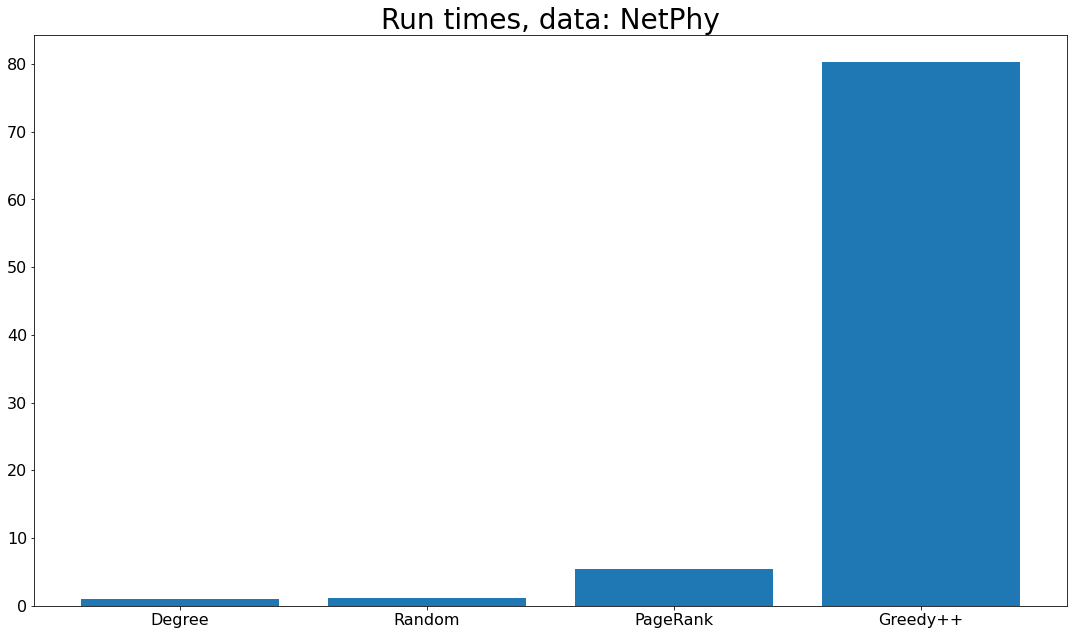

In [61]:
plot_inf("NetPhy", df_greedy_netphy, df_pagerank_netphy, df_degree_netphy, df_random_netphy,
         "Linear")

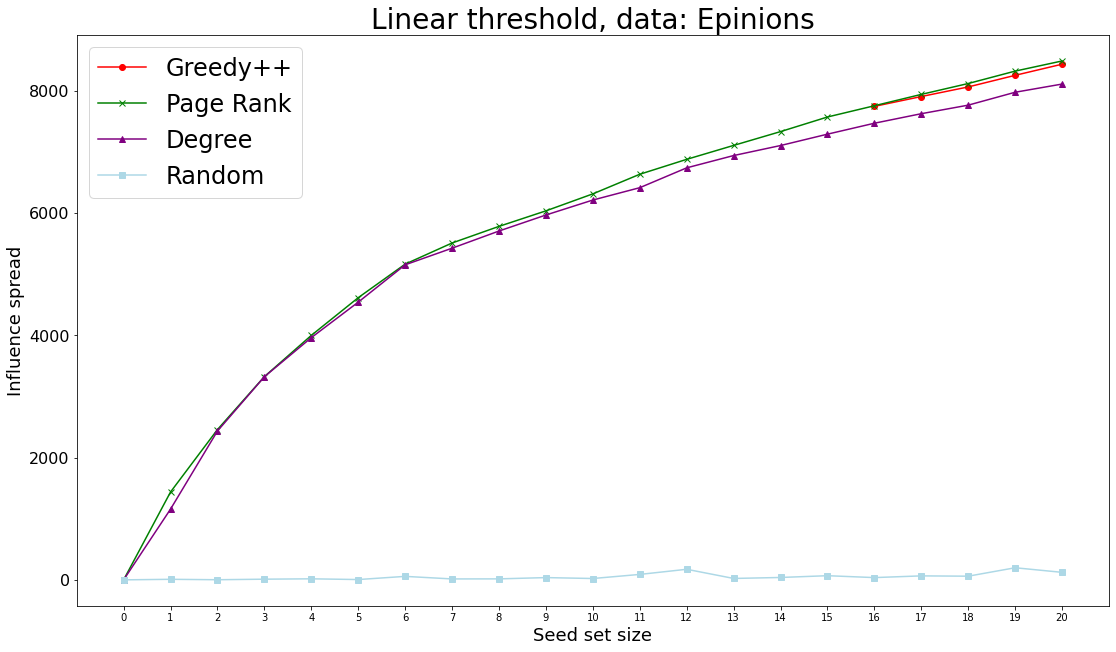

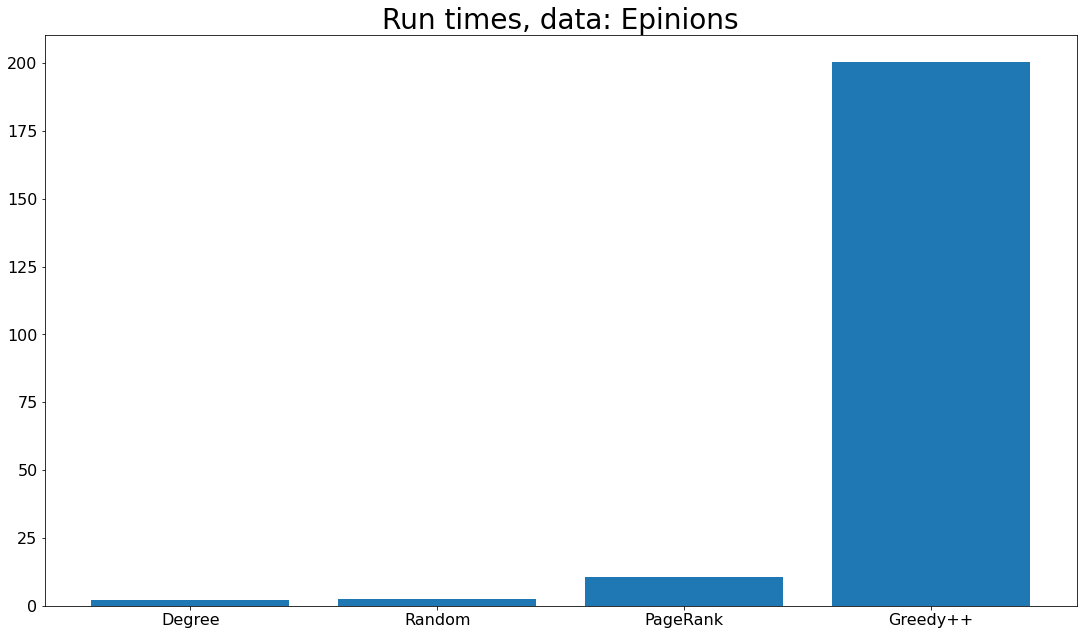

In [132]:
plot_inf("Epinions", df_greedy_epinions, 
         df_pagerank_epinions, df_degree_epinions, df_random_epinions, "Linear")

## Comparison with Published Results

In [39]:
def get_reference_result(dataset, algorithm, threshold):
    path = f"Reference_Results/{dataset}_{threshold}_data.csv"
    df = pd.read_csv(path, header=0, skiprows=[1])
    cols = df.columns.values
    new_cols = []
    colname = None
    for i, col in enumerate(cols):
        if i % 2 == 0:
            colname = col
            new = colname + "_X"
        else:
            new = colname + "_Y"
        new_cols.append(new)
    df.columns = new_cols
    return df[[f"{algorithm}_Y"]]

In [107]:
def plot_reference_comparison(df_greedy, df_page, df_degree, df_random, dataset: str, threshold: str):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df_greedy.Size, df_greedy.Influence, marker="o", color="red", linewidth=2)
    ax.plot(df_page.Influence, marker="x", color="green", linewidth=2)
    ax.plot(df_degree.Influence, marker="^", color="purple", linewidth=2)
    ax.plot(df_random.Influence, marker="s", color="lightblue", linewidth=2)
    
    ref_greedy = get_reference_result(dataset, "Greedy++", threshold)
    ref_pagerank = get_reference_result(dataset, "PageRank", threshold)
    ref_degree = get_reference_result(dataset, "Degree", threshold)
    ref_random = get_reference_result(dataset, "Random", threshold)
    
    ax.plot(ref_greedy.index, ref_greedy, marker="o", color="red", 
            linewidth=1, linestyle="--", alpha=0.85) #, mec="black")
    ax.plot(ref_pagerank.index, ref_pagerank, marker="x", color="green", linewidth=1, linestyle="--", alpha=0.85)
    ax.plot(ref_degree.index, ref_degree, marker="^", color="purple", linewidth=1, linestyle="--", alpha=0.85)
    ax.plot(ref_random.index, ref_random, marker="s", color="lightblue", linewidth=1, linestyle="--", alpha=0.85)
    
    
    ax.legend(['Greedy++', 'Page Rank', 'Degree', 'Random', 'Reference', 'Reference', 'Reference', 'Reference'], 
              fontsize=12, ncol=2)
    ax.set_xticks(np.arange(0, 21))
    ax.set_xlabel("Seed set size", fontsize=12)
    ax.set_ylabel("Influence spread", fontsize=12)
    ax.set_title(f"Comparison to Published Results of {dataset} {threshold} threshold", fontsize=16)
    # ax.set_yticks(fontsize=16)

### NetHEPT linear

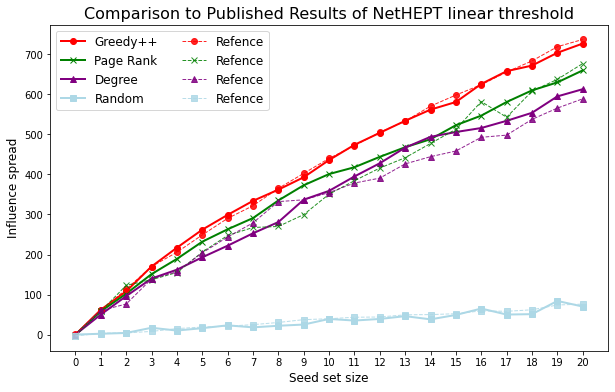

In [108]:
plot_reference_comparison(df_greedy_nethept_linear, df_pagerank_nethept_linear, df_degree_nethept_linear, df_random_nethept_linear,
                       dataset="NetHEPT", threshold="linear")

### NetHEPT concave

In [109]:
plot_reference_comparison(df_greedy_nethept_concave, df_pagerank_nethept_concave, df_degree_nethept_concave, df_random_nethept_concave,
                       dataset="NetHEPT", threshold="concave")

NameError: name 'df_greedy_nethept_concave' is not defined

### NetHEPT convex

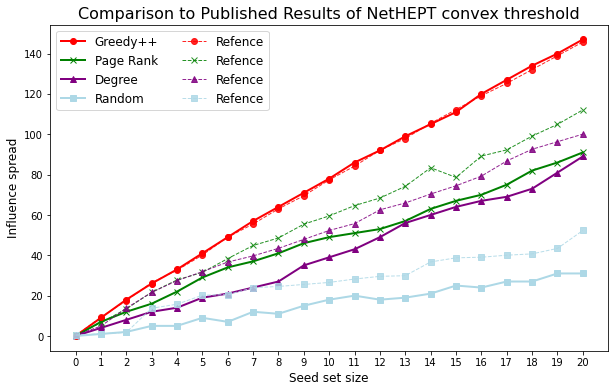

In [110]:
plot_reference_comparison(df_greedy_nethept_convex, df_pagerank_nethept_convex, df_degree_nethept_convex, df_random_nethept_convex,
                       dataset="NetHEPT", threshold="convex")

### NetHEPT majority

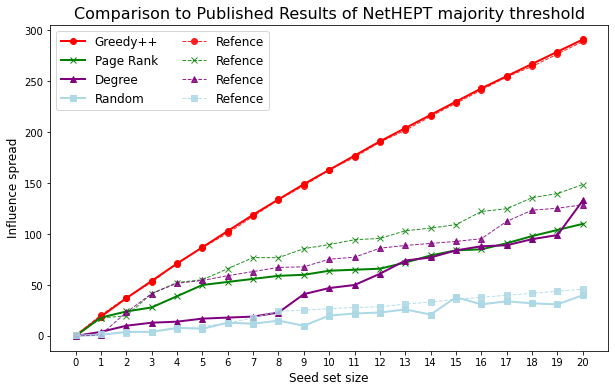

In [112]:
plot_reference_comparison(df_greedy_nethept_majority, df_pagerank_nethept_majority, df_degree_nethept_majority, df_random_nethept_majority,
                       dataset="NetHEPT", threshold="majority")

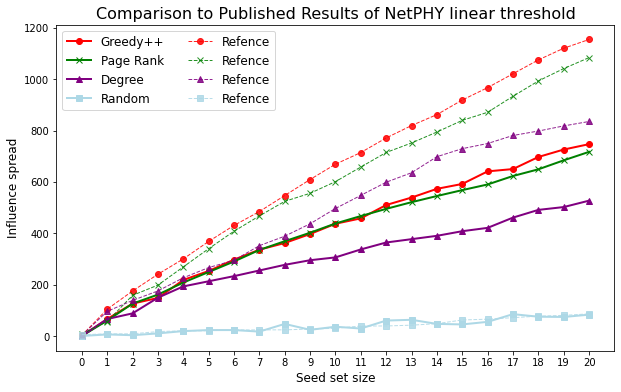

In [113]:
plot_reference_comparison(df_greedy_netphy, df_pagerank_netphy, df_degree_netphy, df_random_netphy,
                       dataset="NetPHY", threshold="linear")

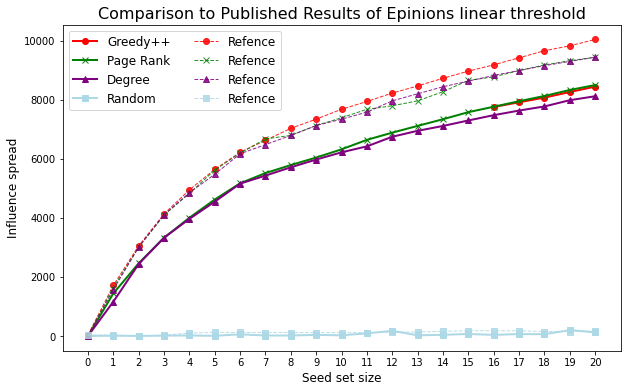

In [114]:
plot_reference_comparison(df_greedy_epinions, df_pagerank_epinions, df_degree_epinions, df_random_epinions,
                       dataset="Epinions", threshold="linear")